In [62]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # high res plotting
import numpy as np
from scipy import stats
from scipy import signal
from numpy import polyfit
import pandas as pd
import pathlib
import seaborn as sns
sns.set_style('whitegrid', {'axes.grid' : False})
import matplotlib
import matplotlib.pyplot as plt

# constants
MAX_TIME_POINTS = 2700

# plot settings
font = {'family' : 'Verdana',
        'weight' : 'regular',
        'size'   : 15}
figure = {'figsize' : (20,8)}
matplotlib.rc('font', **font)
matplotlib.rc('figure', **figure)

In [11]:
# load all csv files in to pandas dataframes
currentDirectory = pathlib.Path('./data/eeg')
currentPattern = "h*"
hlist = []
dfh = []
for currentFile in currentDirectory.glob(currentPattern):
    hlist.append(str(currentFile))
for hpath in hlist:
    dfh.append(pd.read_csv(hpath))
    
currentDirectory = pathlib.Path('./data/eeg')
currentPattern = "c*"
clist = []
dfc = []
for currentFile in currentDirectory.glob(currentPattern):
    clist.append(str(currentFile))
for cpath in clist:
    dfc.append(pd.read_csv(cpath))

In [12]:
len(dfh), len(dfc)

(18, 17)

In [54]:
harray = []
for df in dfh:
    harray.append(df['raw_value'].to_numpy()[:MAX_TIME_POINTS])
harray = np.stack(harray, axis=0)

carray = []
for df in dfc:
    carray.append(df['raw_value'].to_numpy()[:MAX_TIME_POINTS])
carray = np.stack(carray, axis=0)

In [55]:
harray.shape, carray.shape

((18, 2700), (17, 2700))

In [61]:
hlist, clist

(['data/eeg/h_simon_1_say_the_name.csv',
  'data/eeg/h_simon_1_power.csv',
  'data/eeg/h_simon_1_ju$t.csv',
  'data/eeg/h_simon_1_king_kunta.csv',
  'data/eeg/h_simon_1_self_care.csv',
  'data/eeg/h_simon_1_livin_it_up.csv',
  'data/eeg/h_simon_1_windy_ladies.csv',
  'data/eeg/h_simon_1_them_changes.csv',
  'data/eeg/h_simon_1_sugar.csv',
  'data/eeg/h_simon_1_crushin_yeeeeaah.csv',
  'data/eeg/h_simon_1_raid.csv',
  'data/eeg/h_simon_1_breathe_and_stop.csv',
  'data/eeg/h_simon_1_express_yourself.csv',
  'data/eeg/h_simon_1_who_r_u.csv',
  'data/eeg/h_simon_1_jesus_forgive_me_i_am_a_thot.csv',
  'data/eeg/h_simon_1_redbone.csv',
  'data/eeg/h_simon_1_practice.csv',
  'data/eeg/h_simon_1_neighbors.csv'],
 ['data/eeg/c_simon_1_bach_vivace.csv',
  'data/eeg/c_simon_1_scottish_fantasy.csv',
  'data/eeg/c_simon_1_schubert_quarter_12.csv',
  'data/eeg/c_simon_1_at_last.csv',
  'data/eeg/c_simon_1_lied_ohne_worte.csv',
  'data/eeg/c_simon_1_jupiter_jollity.csv',
  'data/eeg/c_simon_1_hungari

<AxesSubplot:>

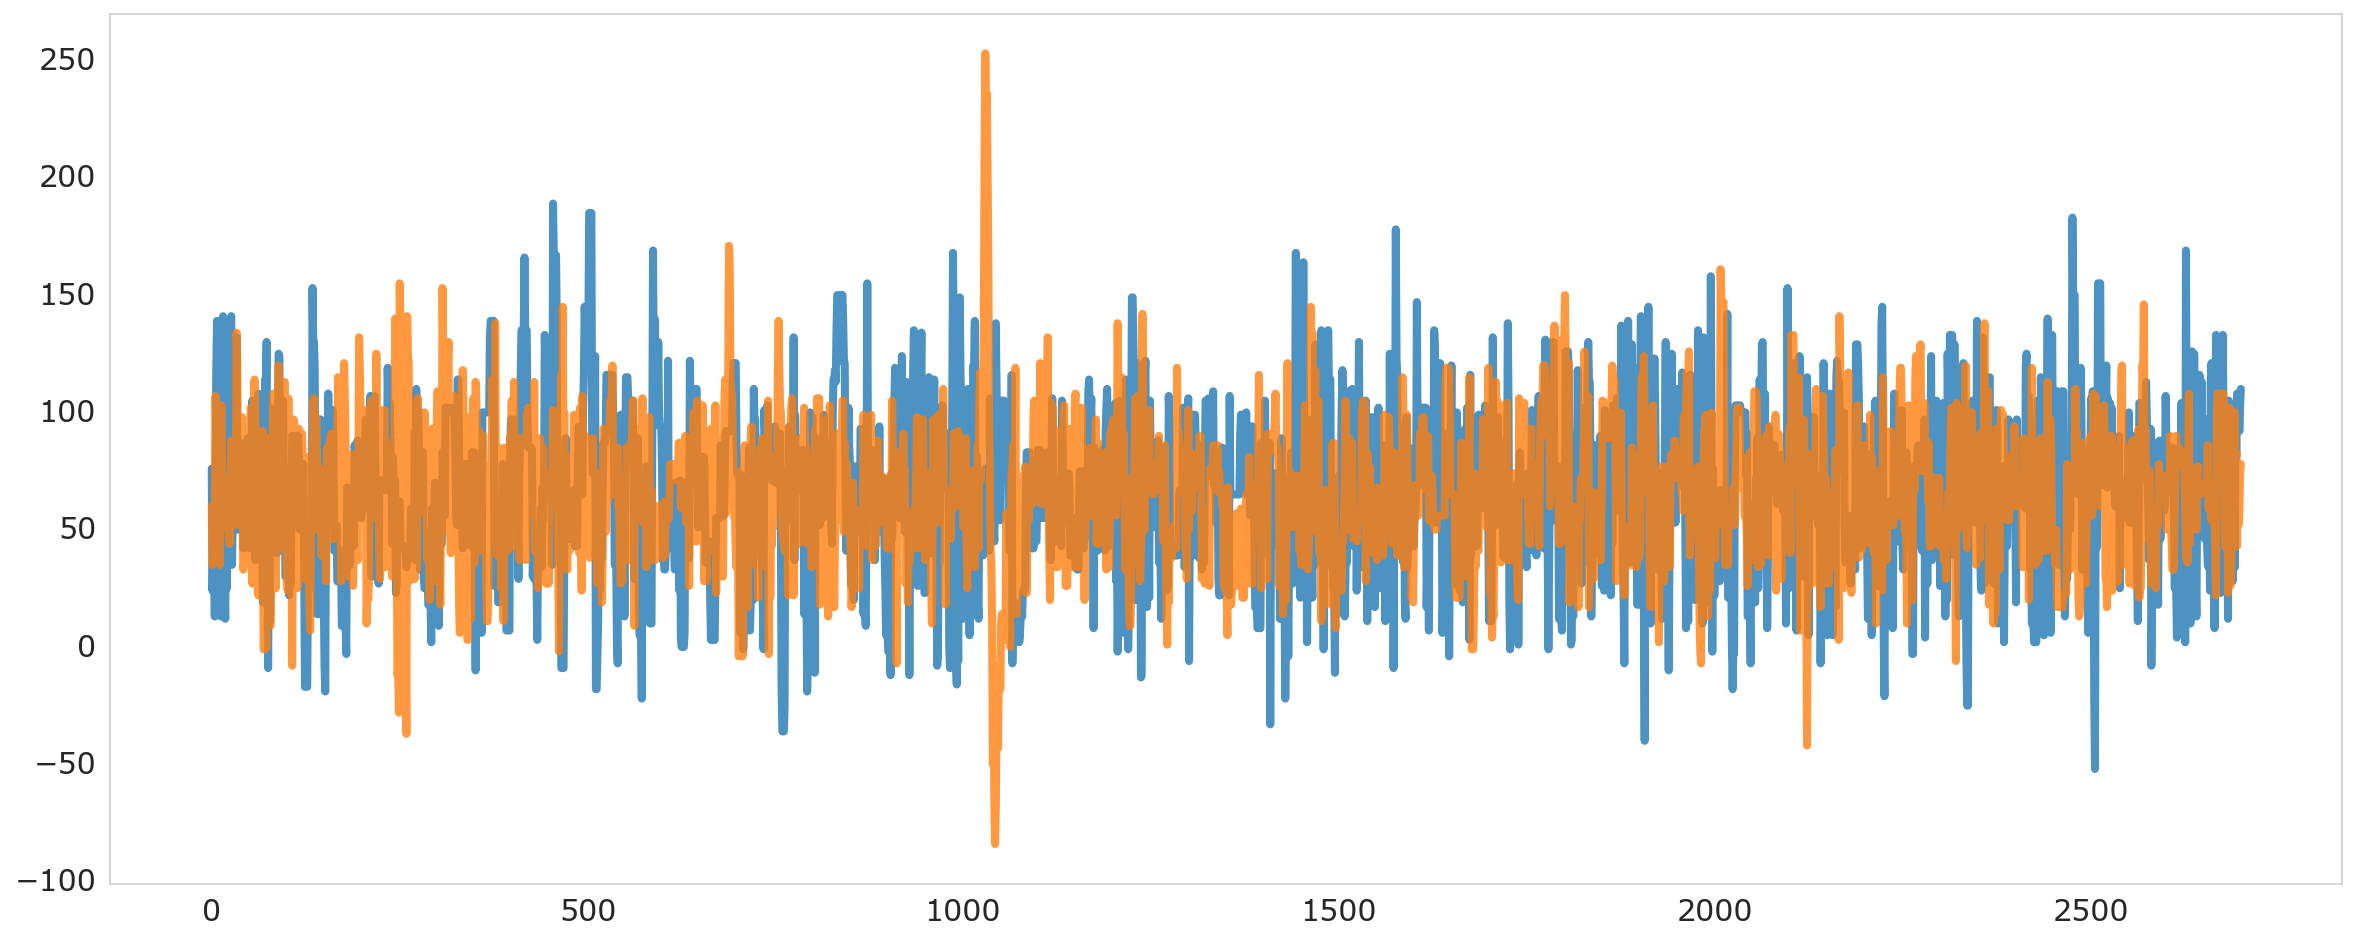

In [59]:
sns.lineplot(data=harray[0], alpha=0.8, linewidth = 4.)
sns.lineplot(data=carray[0], alpha=0.8, linewidth = 4.)

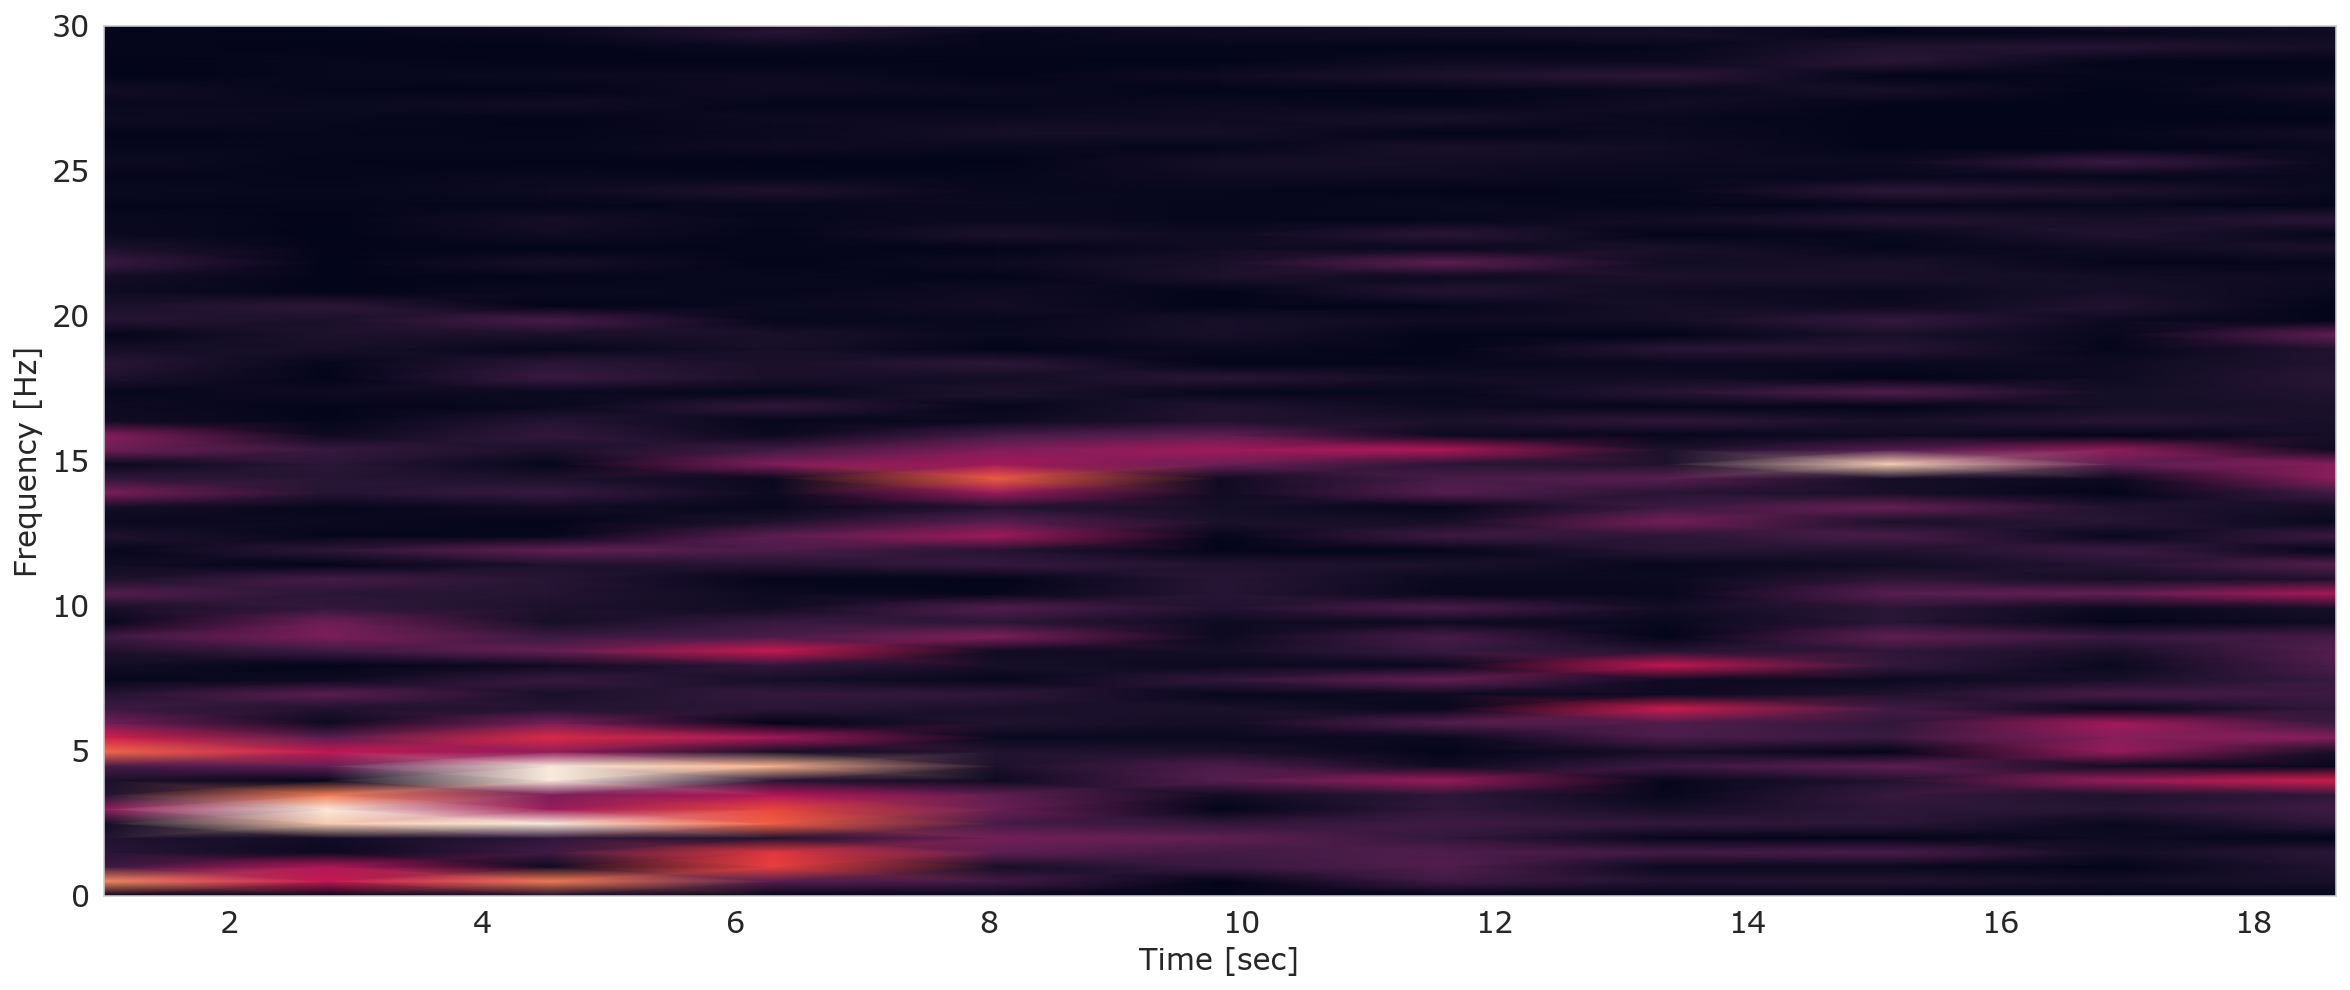

In [71]:
f, t, Sxx = signal.spectrogram(harray[0], fs = 127)
plt.pcolormesh(t, f, Sxx, shading='gouraud', vmax = 300)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(0, 30)
plt.show()

In [76]:
currentDirectory = pathlib.Path('./data/hip_hop')
currentPattern = "*.mp3"
songs = []
for currentFile in currentDirectory.glob(currentPattern):
    songs.append(str(currentFile))
songs[0]
# from pydub import AudioSegment

sound = AudioSegment.from_mp3(songs[0])

# # get raw audio data as a bytestring
# raw_data = sound.raw_data
# # get the frame rate
# sample_rate = sound.frame_rate
# # get amount of bytes contained in one sample
# sample_size = sound.sample_width
# # get channels
# channels = sound.channels

/opt/anaconda3/lib/python3.8/site-packages/pydub/utils.py:198: RuntimeWarning: Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work
  warn("Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work", RuntimeWarning)


FileNotFoundError: [Errno 2] No such file or directory: 'ffprobe'